### Web Scraping

In this section, I have written a code to scrape information from a kaggle dataset that contains information about job postings and skills required for each posting. Using this dataset, we will conduct further analysis and visualize the information to better understand the data after cleaning it.

In [51]:
import json
import requests

In [52]:
#Writing a function to get the number of jobs for a given Key skill
api_url="http://127.0.0.1:5000/data"
def get_number_of_jobs_T(technology):
    payload = {"Key Skills":technology}
    response = requests.get(api_url, params = payload)
    number_of_jobs = 0
    if response.ok:
        data = response.json()
        number_of_jobs+=len(data)
    else:
        number_of_jobs += 0
     #your code goes here
    return technology, number_of_jobs

In [53]:
#Calling the function for Keyskills and checking if it works.

tech = ['C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB']
for i in tech:
    print(get_number_of_jobs_T(i))

('C', 13498)
('C#', 333)
('C++', 305)
('Java', 2609)
('JavaScript', 355)
('Python', 1173)
('Scala', 33)
('Oracle', 784)
('SQL Server', 250)
('MySQL Server', 0)
('PostgreSQL', 10)
('MongoDB', 174)


In [54]:
#Writing a function to find number of jobs for a given location of your choice
def get_number_of_jobs_L(location):
    payload = {"Location":location}
    response = requests.get(api_url, params = payload)
    number_of_jobs = 0
    if response.ok:
        data = response.json()
        number_of_jobs+=len(data)
    else:
        number_of_jobs += len(data)
    return location, number_of_jobs

In [55]:
#Calling the function for Los Angeles and checking if it is working.

location = ['Los Angeles', 'New York', 'San Francisco', 'Washington DC', 'Seattle', 'Austin', 'Detroit']
for i in location:
    print(get_number_of_jobs_L(i))
  

('Los Angeles', 640)
('New York', 3226)
('San Francisco', 435)
('Washington DC', 5316)
('Seattle', 3375)
('Austin', 434)
('Detroit', 3945)


Storing the results in an excel file

In [56]:
#Let's write the results in an excel spreadsheet.
!mamba install openpyxl==3.0.9 -y
from openpyxl import Workbook 


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['openpyxl==3.0.9']

pkgs/r/linux-64          [<=>                 ] (00m:00s) 
pkgs/r/linux-64    

In [57]:
#Creating a workbook and selecting the active worksheet
wb = Workbook()
ws = wb.active

In [58]:
#Appending our findings to the workbook
ws.append(['Location','Job Postings'])
ws.append(['Los Angeles', 640])
ws.append(['San Francisco', 435])
ws.append(['Washington DC', 5316])
ws.append(['Seattle', 3375])
ws.append(['Austin', 434])
ws.append(['Detroit', 3945])
ws.append(['New York', 3226])
wb.save("job_postings.xlsx") 

In [59]:
wb1 = Workbook()
ws1 = wb1.active

ws1.append(['Language', 'Job Postings'])

ws1.append(['C', 13498])
ws1.append(['C#', 333])
ws1.append(['C++', 305])
ws1.append(['Java', 2609])
ws1.append(['Javascript', 355])
ws1.append(['Python', 1173])
ws1.append(['Scala', 33])
ws1.append(['Oracle', 784])
ws1.append(['SQL Server', 250])
ws1.append(['MySQL Server', 0])
ws1.append(['PostgreSQL', 10])
ws1.append(['MongoDB', 174])
wb1.save("popular-languages.xlsx")

## Data Wrangling


<hr>


Here we will clean the database that we obtained by webscraping and make it ready for data analysis.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

In [3]:
#Finding how many duplicates exist in the dataset
df.duplicated(subset= 'Respondent',keep=False).sum()

247

In [4]:
#Dropping the duplicates
df = df.drop_duplicates()

In [5]:
#Verifying if duplicates were dropped
df.shape

(11398, 85)

In [6]:
#Finding missing values in the dataset
missing_data = df.isnull()
for col in missing_data:
    print(col)
    print(missing_data[col].value_counts())


Respondent
False    11398
Name: Respondent, dtype: int64
MainBranch
False    11398
Name: MainBranch, dtype: int64
Hobbyist
False    11398
Name: Hobbyist, dtype: int64
OpenSourcer
False    11398
Name: OpenSourcer, dtype: int64
OpenSource
False    11317
True        81
Name: OpenSource, dtype: int64
Employment
False    11398
Name: Employment, dtype: int64
Country
False    11398
Name: Country, dtype: int64
Student
False    11347
True        51
Name: Student, dtype: int64
EdLevel
False    11286
True       112
Name: EdLevel, dtype: int64
UndergradMajor
False    10661
True       737
Name: UndergradMajor, dtype: int64
EduOther
False    11234
True       164
Name: EduOther, dtype: int64
OrgSize
False    11302
True        96
Name: OrgSize, dtype: int64
DevType
False    11333
True        65
Name: DevType, dtype: int64
YearsCode
False    11389
True         9
Name: YearsCode, dtype: int64
Age1stCode
False    11385
True        13
Name: Age1stCode, dtype: int64
YearsCodePro
False    11382
True        

In [7]:
#Imputing missing values
df[['WorkLoc']].value_counts()



WorkLoc                                       
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
dtype: int64

In [8]:
#We find that 'Office' is the most frequently occuring category in the WorkLoc column
import numpy as np
df['WorkLoc'].replace(np.nan, 'Office', inplace=True)

In [9]:
#Verifying if imputing was succesfull 
df[['WorkLoc']].isnull().value_counts()

WorkLoc
False      11398
dtype: int64

In [10]:
#We normalize the value of annual compensation as it is present in different formats.
#To be analysis ready we normalize it under the same format

df['CompFreq'].value_counts()

Yearly     6073
Monthly    4788
Weekly      331
Name: CompFreq, dtype: int64

In [11]:
#We create a new column and add it to the dataframe
for i in df['CompFreq']:
    if i == 'Yearly':
        df['NormalizedAnnualCompensation'] = df['CompTotal']
    elif i == 'Monthly':
        df['NormalizedAnnualCompensation'] = df['CompTotal']*12
    elif i == 'Weekly':
        df['NormalizedAnnualCompensation'] = df['CompTotal']*52

pd.set_option('display.max_columns',None)
df.head(3)



,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Test

## Exploratory Data Analysis

Now that the data has been cleaned, the dataset is now ready to be explored further and analyzed to gain better insights.

In [30]:
import seaborn as sns
import numpy as np


In [26]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

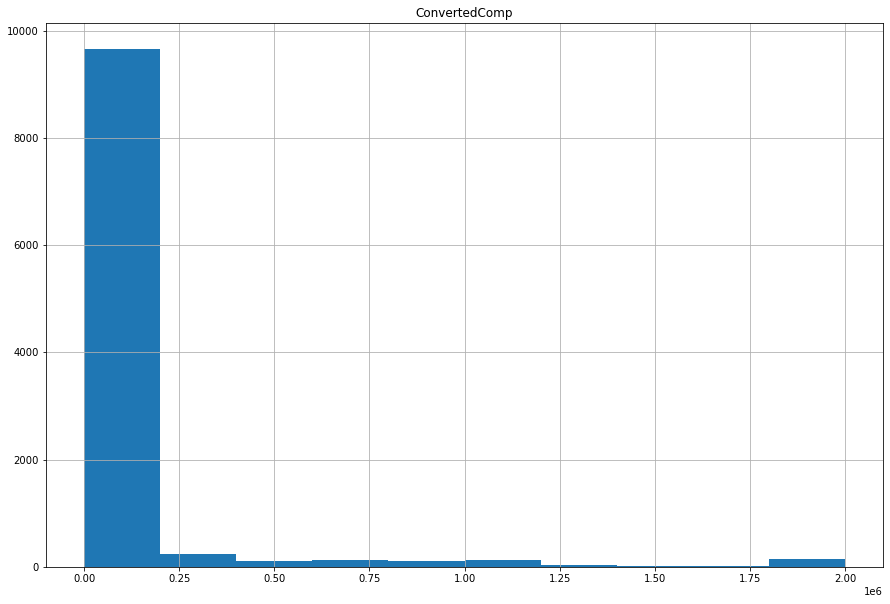

In [32]:
#Plotting the histogram for the column ConvertedComp.
df.hist(column=['ConvertedComp'], figsize = (15,10))

In [35]:
#Finding gender distribution
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [36]:
#Finding out the median ConvertedComp of responders that identified themselves only as a Woman?

df_wom = df[df['Gender'] =='Woman']
df_wom.dropna(subset = ['ConvertedComp'])
df_wom['ConvertedComp'].median()

57708.0

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

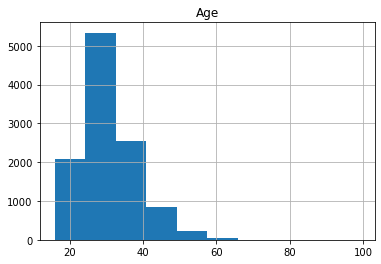

In [37]:
#Finding age distribution 
df.hist('Age')

Outliers

<AxesSubplot:>

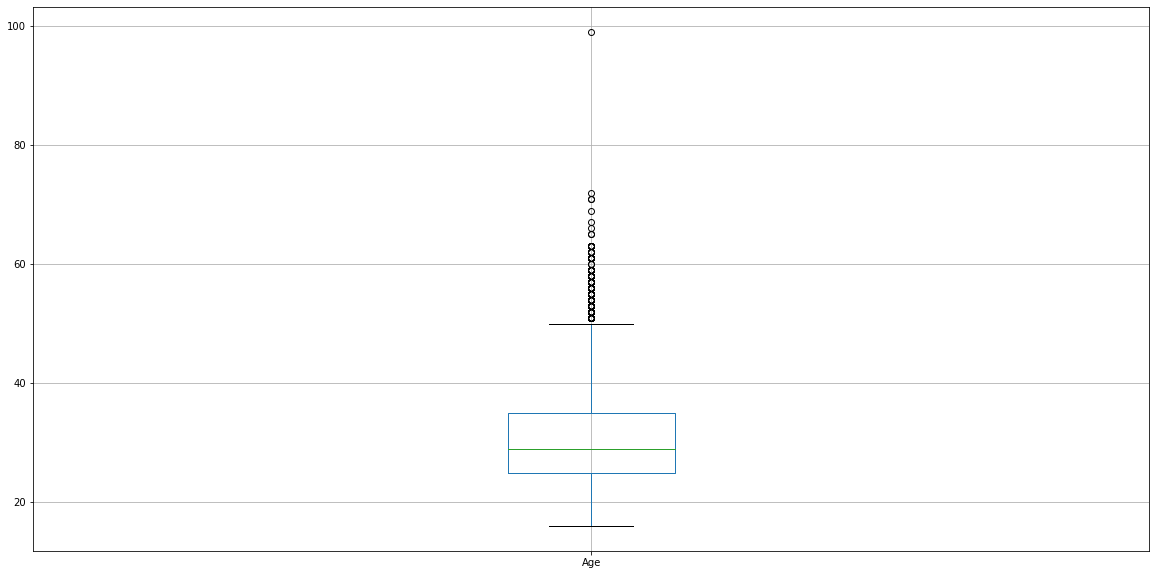

In [38]:
#Finding out if outliers exist in the column ConvertedComp using a box plot
df.boxplot(column = ['Age'], figsize=(20,10))

In [41]:
#Finding out the Inter Quartile Range, upper and lower bounds for the column ConvertedComp.
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75) 
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr 
print(upper_bound, lower_bound)
print(iqr)

209698.0 -82830.0
73132.0


In [42]:
#Identifying how many outliers are there in the ConvertedComp column.
count = 0
for i in df['ConvertedComp']:
    if i > upper_bound:
        count+=1
    elif i < lower_bound:
        count+=1
print(count)

879


In [44]:
#Createing a new dataframe by removing the outliers from the ConvertedComp column.

new_df=df[['ConvertedComp']].clip(lower_bound, upper_bound, axis=0)

Correlation

In [45]:
#Find the correlation between new ConvertedComp and all other numerical columns.

df[['Age', 'ConvertedComp', 'CompTotal', 'WorkWeekHrs', 'Respondent', 'CodeRevHrs']].corr()

,Age,ConvertedComp,CompTotal,WorkWeekHrs,Respondent,CodeRevHrs
Age,1.000000,0.105386,0.006970,0.036518,0.004041,-0.020469
ConvertedComp,0.105386,1.000000,0.001037,0.021143,0.002181,-0.033865
CompTotal,0.006970,0.001037,1.000000,0.003510,-0.013490,0.007063
WorkWeekHrs,0.036518,0.021143,0.003510,1.000000,-0.015314,0.026517
Respondent,0.004041,0.002181,-0.013490,-0.015314,1.000000,0.004621
CodeRevHrs,-0.020469,-0.033865,0.007063,0.026517,0.004621,1.000000


## Data Visualizations

In this section, we will make some key visualizations to help understand the dataset better and conduct a much better analysis.

In [14]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-03-28 07:05:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  23.9MB/s    in 1.5s    

2022-03-28 07:05:47 (23.9 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



In [15]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Histograms


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

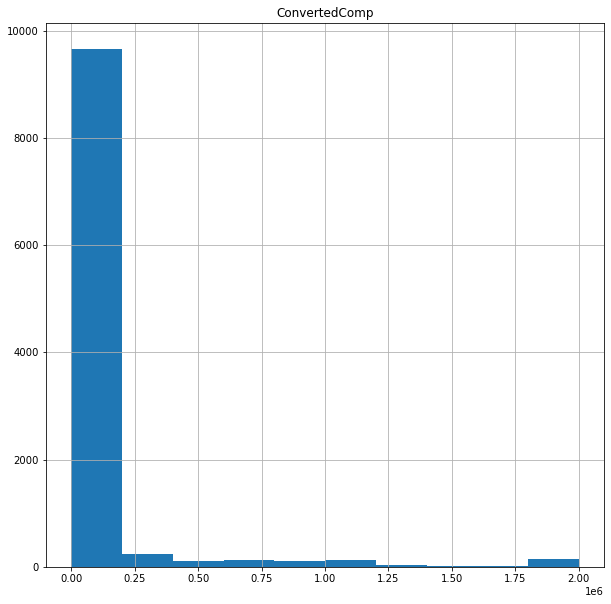

In [16]:
#Histograms
QUERY = """ select ConvertedComp from master"""
df = pd.read_sql_query(QUERY,conn)
df.hist("ConvertedComp",figsize=(10,10))

Box Plots


<AxesSubplot:>

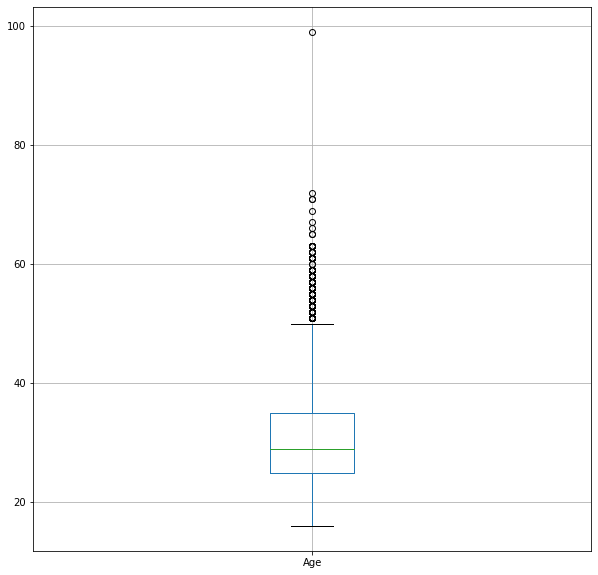

In [18]:
#Box Plot
query = """SELECT AGE FROM MASTER"""
df = pd.read_sql_query(query,conn)
df.boxplot(figsize=(10,10))

Visualizing relationships in data using Scatter Plots

<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

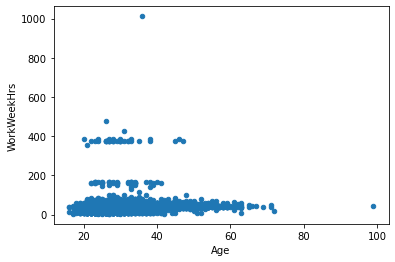

In [19]:
#Scatter plot of Age and WorkWeekHrs.

query = """select Age, WorkWeekHrs from master"""
df = pd.read_sql_query(query,conn)
df.plot.scatter(x = "Age",y = "WorkWeekHrs")

Bubble Plots

<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

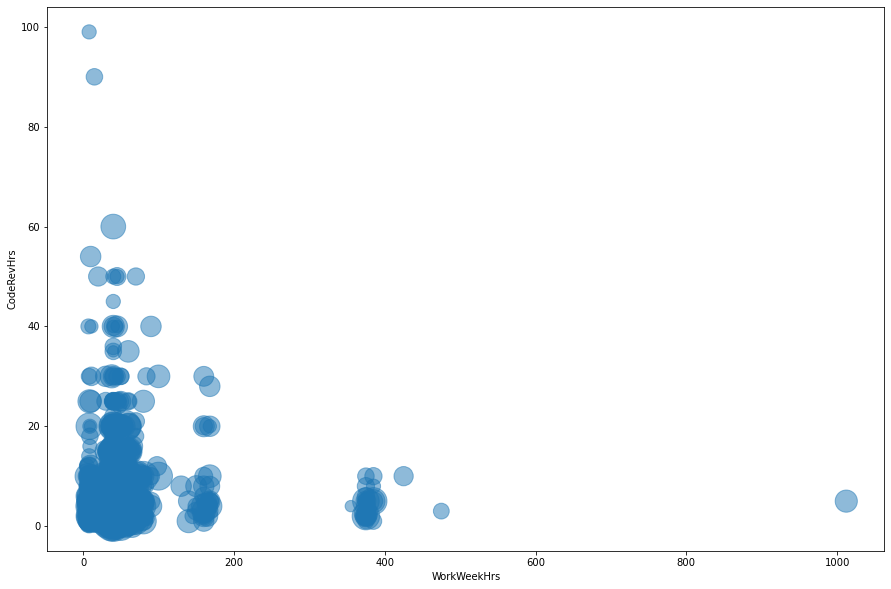

In [21]:
#Bubble plot of WorkWeekHrs and CodeRevHrs using Age column as bubble size
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
query = """ SELECT WorkWeekHrs, CodeRevHrs, Age FROM master """
df = pd.read_sql_query(query,conn)
df.plot(kind ='scatter', x='WorkWeekHrs', y='CodeRevHrs', figsize = (15,10), s= norm_age*2000+10, alpha=0.5)

Stacked Charts

<AxesSubplot:xlabel='Age'>

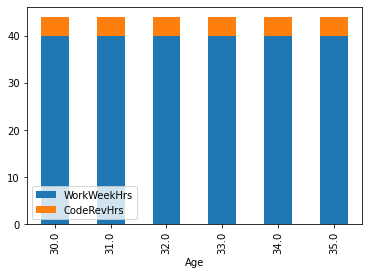

In [22]:
#Stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35.
query = """ select WorkWeekHrs, CodeRevHrs, Age from master
            where Age between 30 and 35
            order by Age"""
df = pd.read_sql_query(query,conn)
df_new = df.groupby(['Age']).median()
df_new.plot(kind='bar', stacked =True)

Visualizing comparison of data using Line Chart

<AxesSubplot:xlabel='Age'>

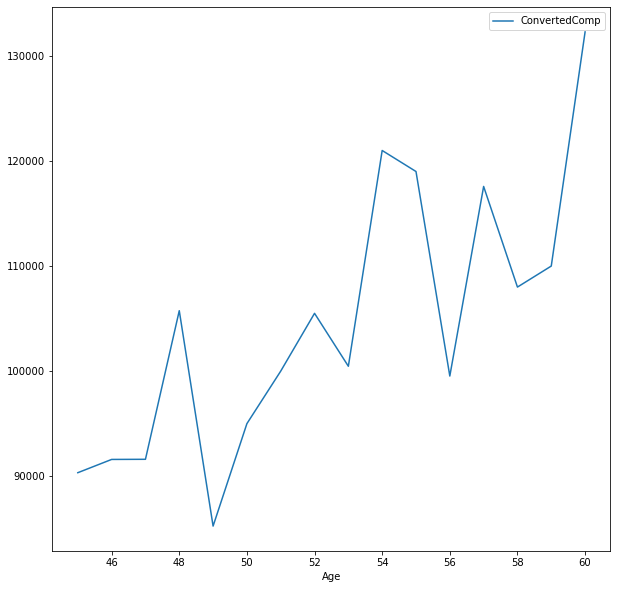

In [23]:
#Plotting the median ConvertedComp for all ages from 45 to 60.
import numpy as np
query = """ Select ConvertedComp, Age from master
            where Age between 45 and 60
            Order by Age"""
df = pd.read_sql_query(query,conn)
df_new = df.groupby(['Age']).median()
df_new.plot(kind='line', figsize=(10,10))

Bar Chart

Text(0.5, 1.0, 'Count of Branches')

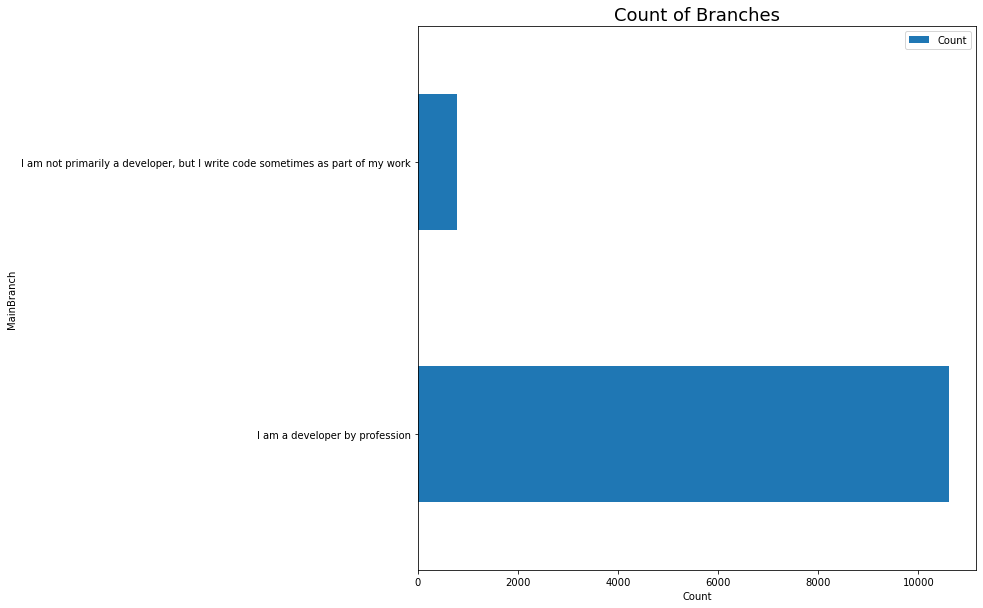

In [24]:
#Creating a horizontal bar chart using column MainBranch.
query = """ Select MainBranch, count(MainBranch) as Count from master
            group by MainBranch """
df = pd.read_sql_query(query,conn)
df.set_index('MainBranch',inplace=True)
df.plot.barh(figsize=(10,10))
plt.xlabel("Count")
plt.title("Count of Branches", size = 18)

In [60]:
conn.close()